<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
datafile='./sat_scores.csv'
reader = csv.reader(open(datafile))
dictSat={}
for row in reader:
    dictSat[row[0]]=row[1:]

In [3]:
dictSat

{'AK': ['51', '514', '510'],
 'AL': ['9', '559', '554'],
 'AR': ['6', '562', '550'],
 'AZ': ['34', '523', '525'],
 'All': ['45', '506', '514'],
 'CA': ['51', '498', '517'],
 'CO': ['31', '539', '542'],
 'CT': ['82', '509', '510'],
 'DC': ['56', '482', '474'],
 'DE': ['67', '501', '499'],
 'FL': ['54', '498', '499'],
 'GA': ['63', '491', '489'],
 'HI': ['52', '485', '515'],
 'IA': ['5', '593', '603'],
 'ID': ['17', '543', '542'],
 'IL': ['12', '576', '589'],
 'IN': ['60', '499', '501'],
 'KS': ['9', '577', '580'],
 'KY': ['12', '550', '550'],
 'LA': ['7', '564', '562'],
 'MA': ['79', '511', '515'],
 'MD': ['65', '508', '510'],
 'ME': ['69', '506', '500'],
 'MI': ['11', '561', '572'],
 'MN': ['9', '580', '589'],
 'MO': ['8', '577', '577'],
 'MS': ['4', '566', '551'],
 'MT': ['23', '539', '539'],
 'NC': ['65', '493', '499'],
 'ND': ['4', '592', '599'],
 'NE': ['8', '562', '568'],
 'NH': ['72', '520', '516'],
 'NJ': ['81', '499', '513'],
 'NM': ['13', '551', '542'],
 'NV': ['33', '509', '5

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
dataSat = pd.read_csv(datafile)
dictSat2=dict(dataSat)

In [5]:
dataSat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [6]:
dataSat.shape

(52, 4)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
dataSat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
# dataDict=dataSat.dtypes.apply(lambda x: x.name).to_dict()
# print dataDict
# shape= dataSat.shape
# print shape
# print shape[0]
# dataDict['Shape']=dataSat.shape
# dataDict

DataDic={'Math': {'Var Type':'int64','Description':'Math score in a state'},
         'Rate': {'Var Type':'int64','Description':'Participation Rate'},
        'State': {'Var Type':'object','Description':'Letter code that represents the state'},
        'Verbal': {'Var Type':'int64','Description':'Verbal score in a state'},
        'Shape': {'Rows:':52,'Columns': 4}
        }
DataDic

{'Math': {'Description': 'Math score in a state', 'Var Type': 'int64'},
 'Rate': {'Description': 'Participation Rate', 'Var Type': 'int64'},
 'Shape': {'Columns': 4, 'Rows:': 52},
 'State': {'Description': 'Letter code that represents the state',
  'Var Type': 'object'},
 'Verbal': {'Description': 'Verbal score in a state', 'Var Type': 'int64'}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

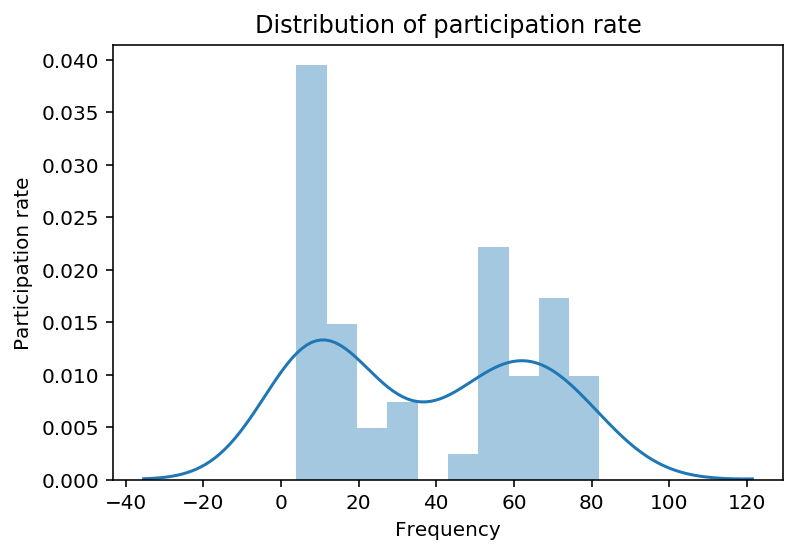

In [9]:
#Rate
# plotting with seaborn

rate = sns.distplot(dataSat['Rate'], bins=10)
rate.set_title('Distribution of participation rate');
rate.set_ylabel('Participation rate');
rate.set_xlabel('Frequency');

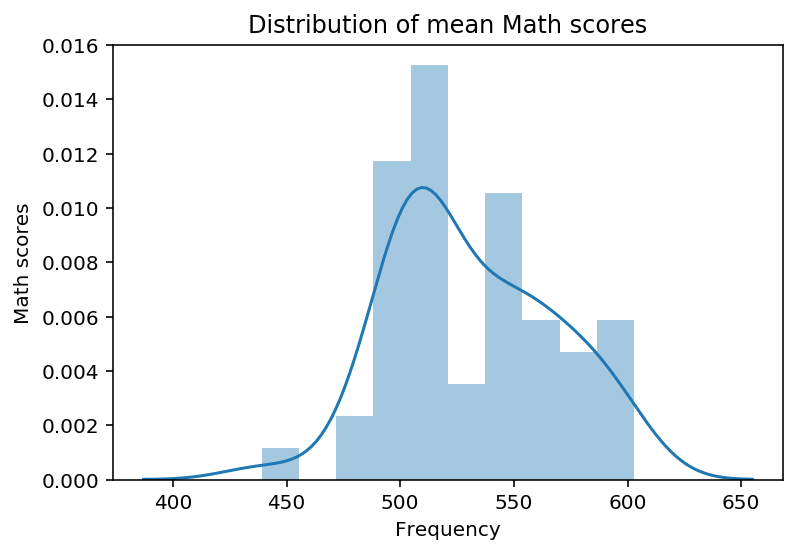

In [10]:
#Math

math = sns.distplot(dataSat['Math'], bins=10)
math.set_title('Distribution of mean Math scores');
math.set_ylabel('Math scores');
math.set_xlabel('Frequency');

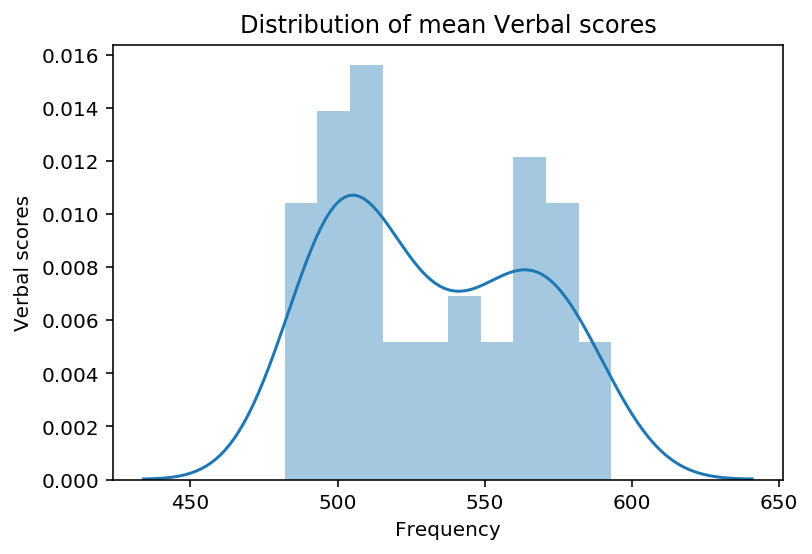

In [11]:
#Verbal

verbal = sns.distplot(dataSat['Verbal'], bins=10)
verbal.set_title('Distribution of mean Verbal scores');
verbal.set_ylabel('Verbal scores');
verbal.set_xlabel('Frequency');

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

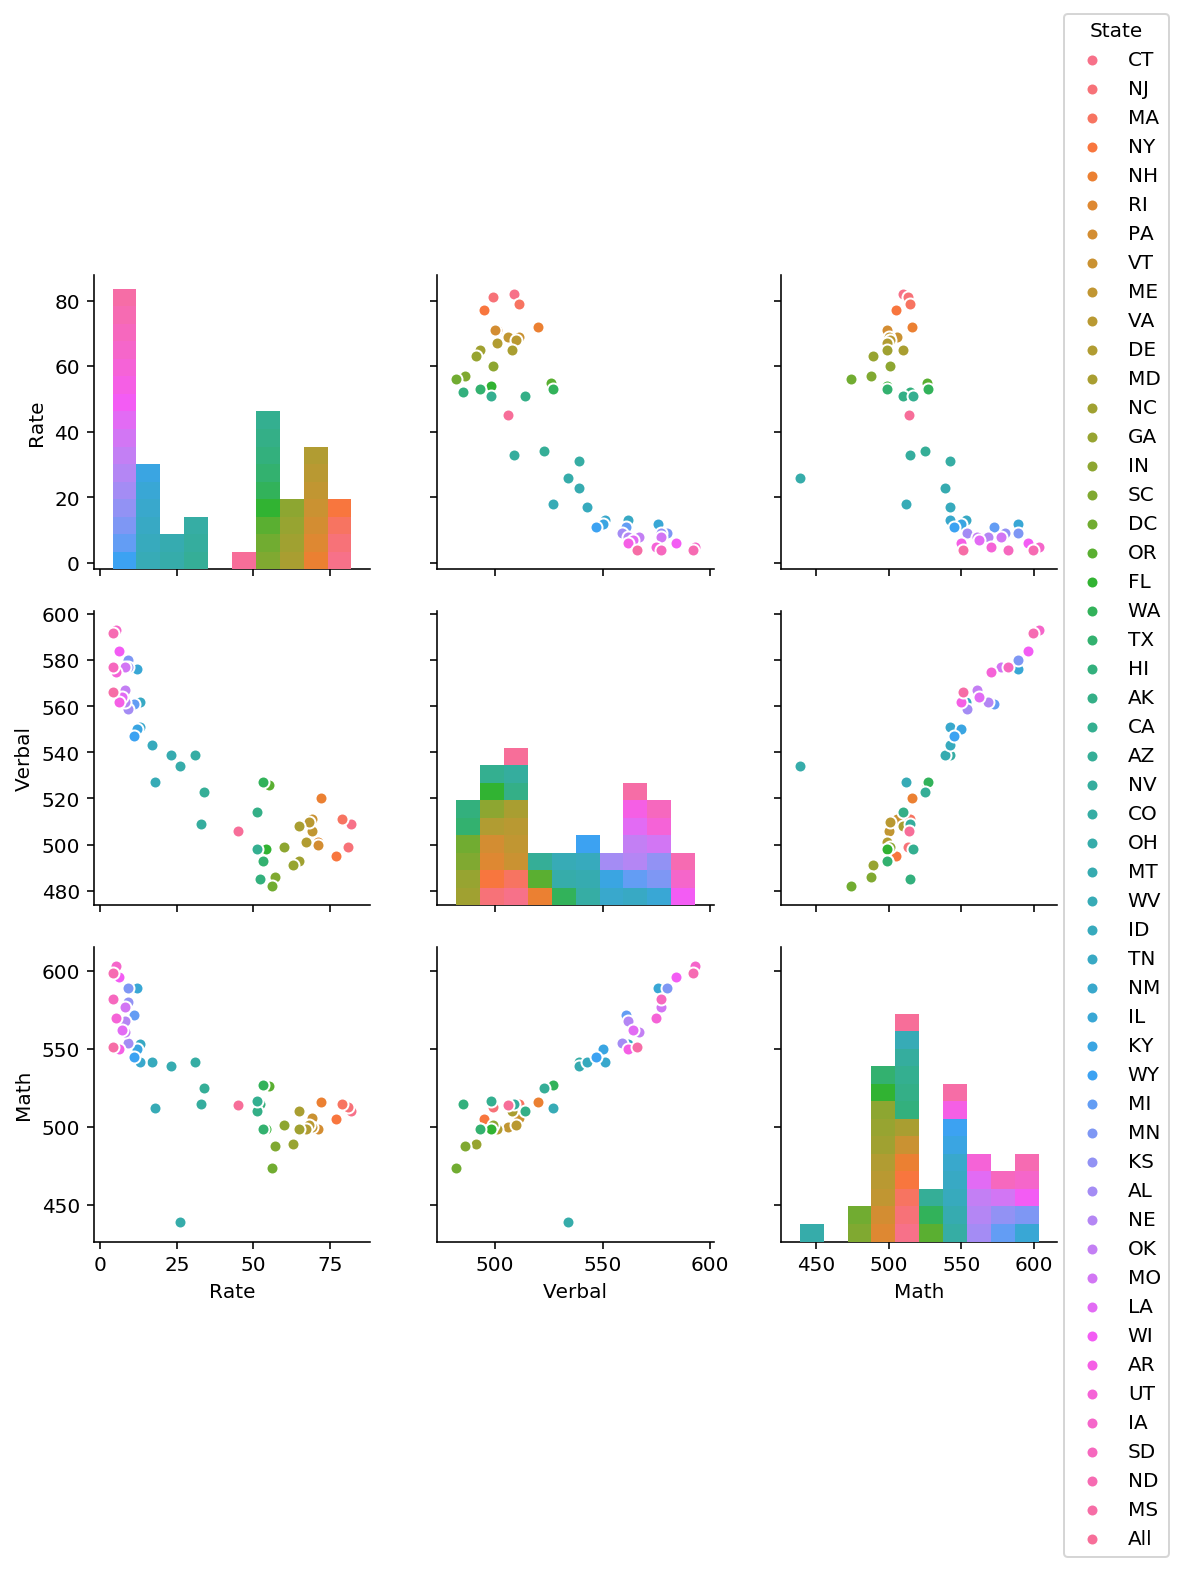

In [12]:
#Use hue=state to map plot aspects to different colors
plt.figure(figsize = (12, 6))
sns.pairplot(dataSat,hue='State')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

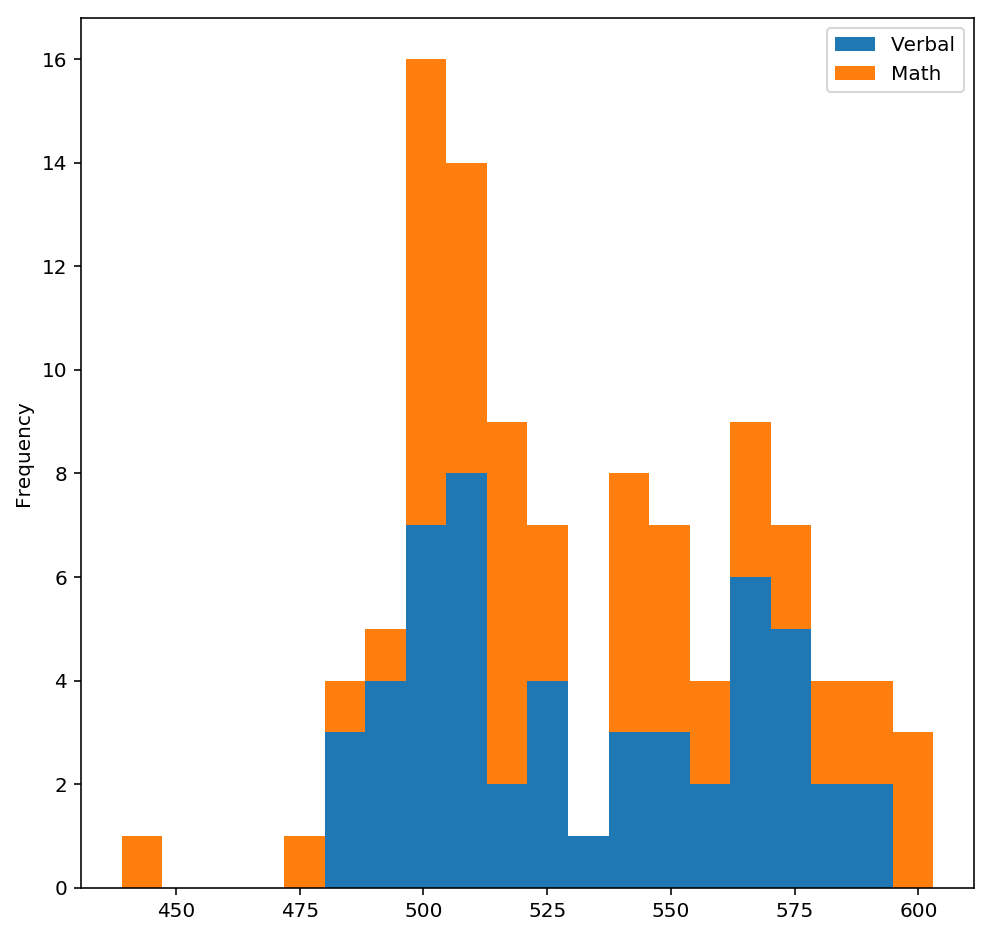

In [13]:
# This portiona dos not work. Get error: AttributeError: 'module' object has no attribute 'plt'
# It's odd since plt was already declared above
# dataSat[['Verbal', 'Math']].plot.hist(stacked = True, bins = 15)
# sns.plt.show()

verbal_math = dataSat[['Verbal','Math']]
verbal_math.plot.hist(stacked=True, bins=20, figsize=(8,8))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

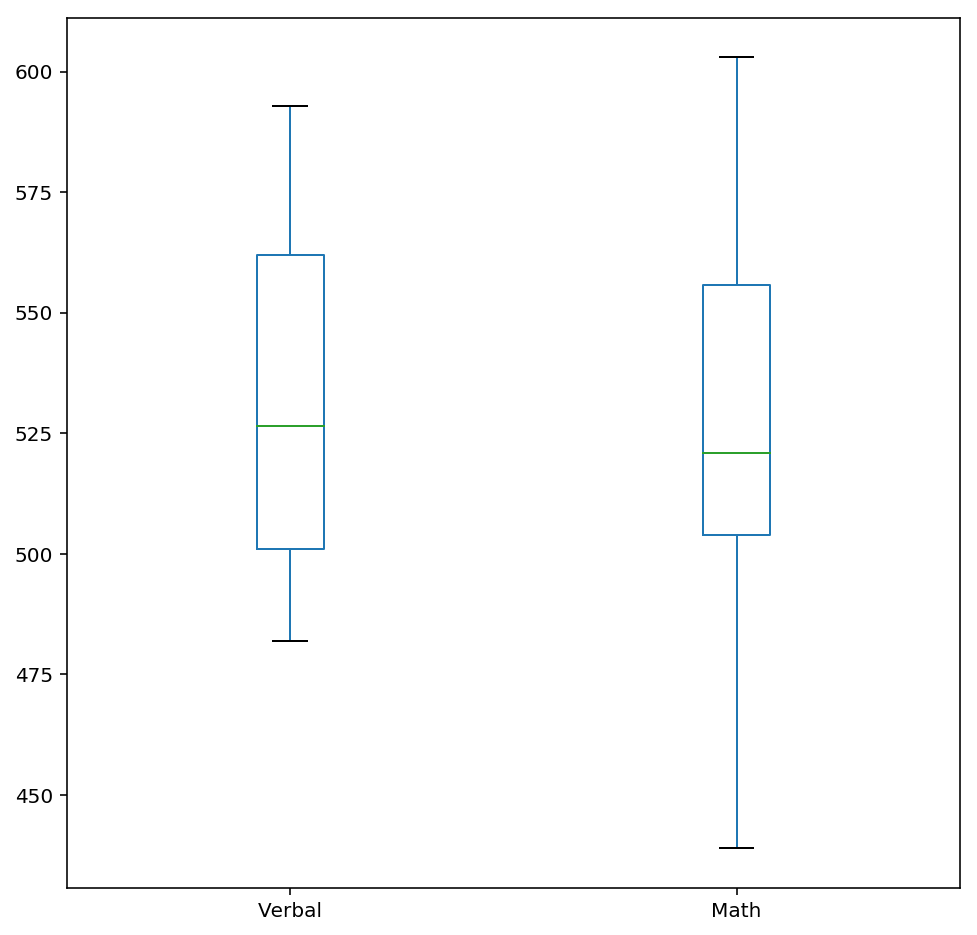

In [14]:
# verbal_math = dataSat[['Verbal','Math']]
verbal_math.plot.box(figsize=(8,8))

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


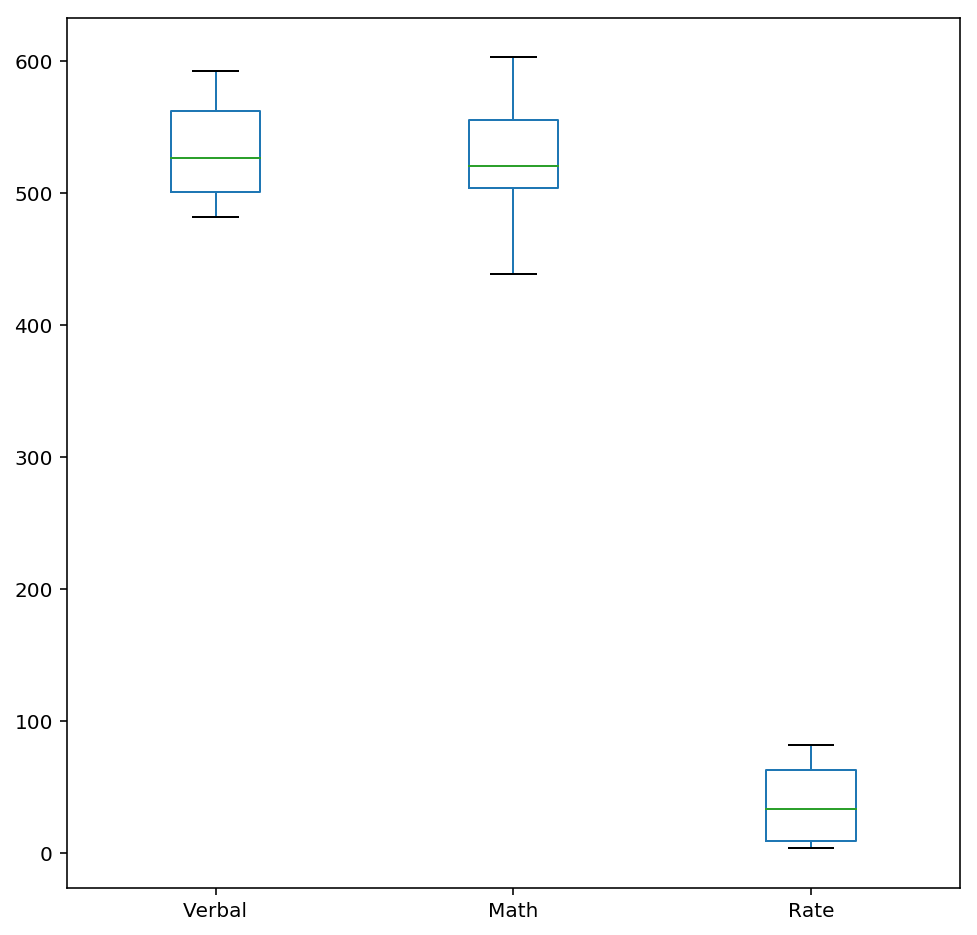

In [15]:
verbalmathrate = dataSat[['Verbal','Math','Rate']]
verbalmathrate.plot.box(figsize=(8,8))

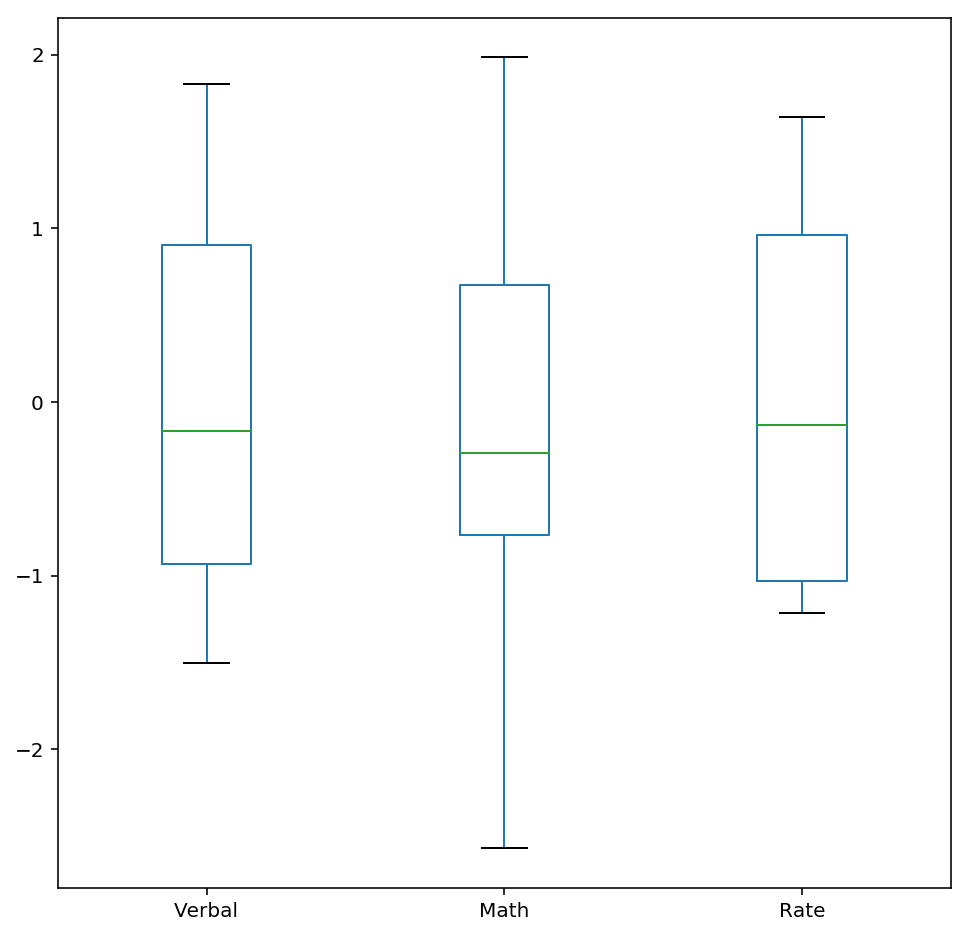

In [16]:
# Something is wrong with the data for rate
#There is a huge difference for Rate when compared to Verbal and Math
# dataSat.mean()
# Rate       37.153846
# Verbal    532.019231
# Math      531.500000
# Normalized the data by subtracting the mean and dividing by the standard deviation
# normalized = (data - data.mean()) / data.std()

normal = dataSat[['Verbal','Math','Rate']]
normal = (normal - normal.mean()) / normal.std()
normal.plot.box(figsize=(8,8))

# The new figure shows the 3 variables more closely aligned

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
verbalAVG = dataSat.Verbal.mean()
# verbalAVG
# print dataSat[dataSat.Verbal > verbalAVG]
verbalstates = dataSat[dataSat.Verbal > verbalAVG]
print verbalstates['State']
# verbalstates.shape[0]
print 'No. of states with Verbal scores above mean: {}'.format(verbalstates.shape[0])

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
No. of states with Verbal scores above mean: 24


About half the states have a Verbal average score higher than the average across all states.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
verbalMedian= dataSat.Verbal.median()
verbalstates= dataSat[dataSat.Verbal > verbalMedian]
print verbalstates['State']
print 'No. of states with Verbal scores above median: {}'.format(verbalstates.shape[0])

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
No. of states with Verbal scores above median: 26


Around more than half the states have a Verbal median score that's higher than the average across all states.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
dataSat['Verbal and Math Difference'] = dataSat.Verbal - dataSat.Math

dataSat.head(5)

,State,Rate,Verbal,Math,Verbal and Math Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
newDF1 = dataSat.sort_values(['Verbal and Math Difference'], ascending=False).iloc[0:10,:]
newDF2 = dataSat.sort_values(['Verbal and Math Difference'], ascending=True).iloc[0:10,:]

print newDF1.head(3)
print newDF2.head(3)

   State  Rate  Verbal  Math  Verbal and Math Difference
27    OH    26     534   439                          95
50    MS     4     566   551                          15
29    WV    18     527   512                          15
   State  Rate  Verbal  Math  Verbal and Math Difference
21    HI    52     485   515                         -30
23    CA    51     498   517                         -19
1     NJ    81     499   513                         -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
dataSat[['Verbal','Math','Rate','Verbal and Math Difference']].corr()

# 'Verbal' and 'Math' are positively correlated

,Verbal,Math,Rate,Verbal and Math Difference
Verbal,1.000000,0.899871,-0.886432,0.052600
Math,0.899871,1.000000,-0.773746,-0.388219
Rate,-0.886432,-0.773746,1.000000,-0.101412
Verbal and Math Difference,0.052600,-0.388219,-0.101412,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
# dataSat.describe()
dataSat.describe().T

,count,mean,std,min,25%,50%,75%,max
Rate,52.0,37.153846,27.301788,4.0,9.0,33.5,63.50,82.0
Verbal,52.0,532.019231,33.236225,482.0,501.0,526.5,562.00,593.0
Math,52.0,531.500000,36.014975,439.0,504.0,521.0,555.75,603.0
Verbal and Math Difference,52.0,0.519231,15.729939,-30.0,-6.0,0.0,4.25,95.0


count: the number of rows
mean: the mean of the column
std: standard deviation of the column
min: minimum value of the column
25%: the 25% quantile
50%: the median
75%: the 75% quantile
max: the maximum value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [23]:
satCOV = dataSat.cov()
satCOV

,Rate,Verbal,Math,Verbal and Math Difference
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal and Math Difference,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [24]:
dataFile='./drug-use-by-age.csv'
dataDrug = pd.read_csv(dataFile)


In [25]:
dataDrug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [26]:
dataDrug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [27]:
dataDrug.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0


In [28]:
dataDrug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [29]:
# The age column is categorised as object instead of numerical
# seems that some of the values were given as a range instead
# going to have to somehow replace the values of the range
dataDrug.age.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [30]:
# Cleaning up the values for age
# The raange will instead be the average of the 2 numbers
# A new DF will be created from the origianl dataset, dataDrugClean
dataDrugClean = dataDrug
ageCleanup={'12':12.,
            '13':13.,
            '14':14.,
            '15':15.,
            '16':16.,
            '17':17.,
            '18':18.,
            '19':19.,
            '20':20.,
            '21':21.,
            '22-23':22.5,
            '24-25':24.5,
            '26-29':27.5,
            '30-34':32.,
            '35-49':42.,
            '50-64':57.,
            '65+':65
}
dataDrugClean['age']=dataDrugClean.age.map(lambda x: ageCleanup[x])

In [31]:
dataDrugClean.age.unique()

array([12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22.5,
       24.5, 27.5, 32. , 42. , 57. , 65. ])

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

## Hypothesis: What is the alcohol comsumption and frequency throughout the age groups?

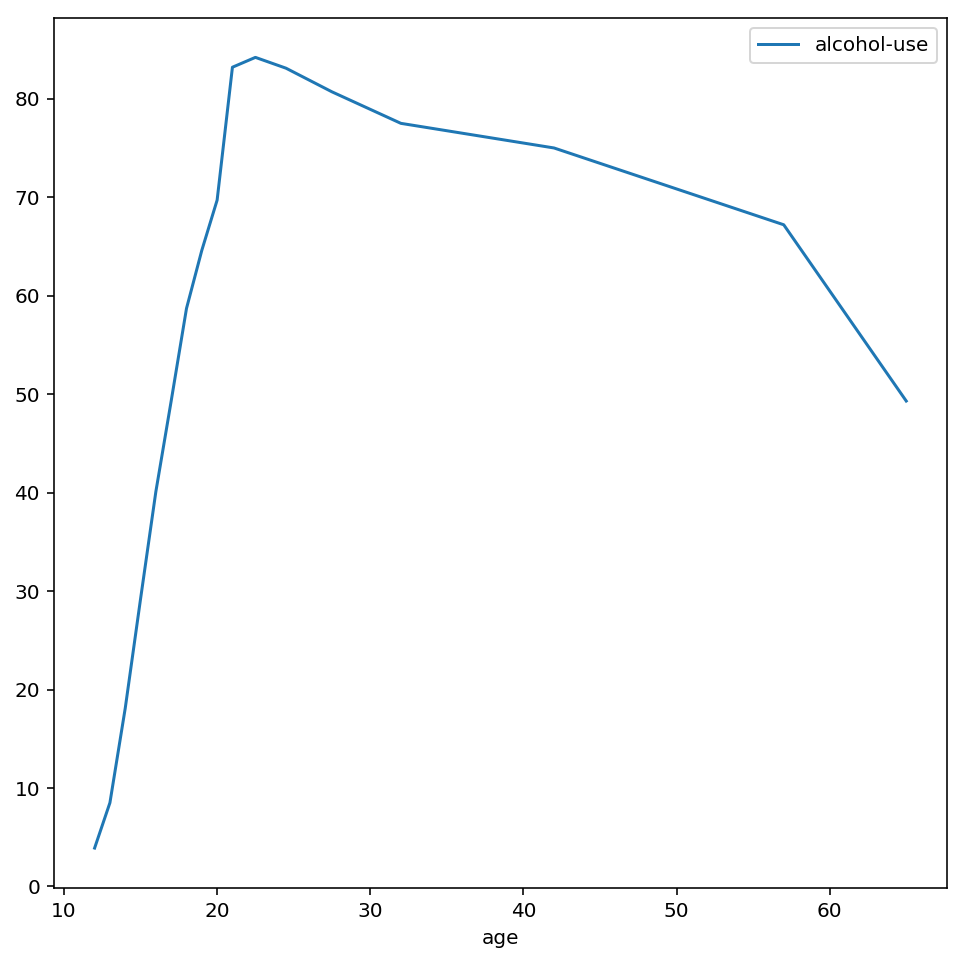

In [32]:
# Code
# dataDrugClean.columns
dataDrugClean.plot('age', 'alcohol-use', figsize=(8,8))

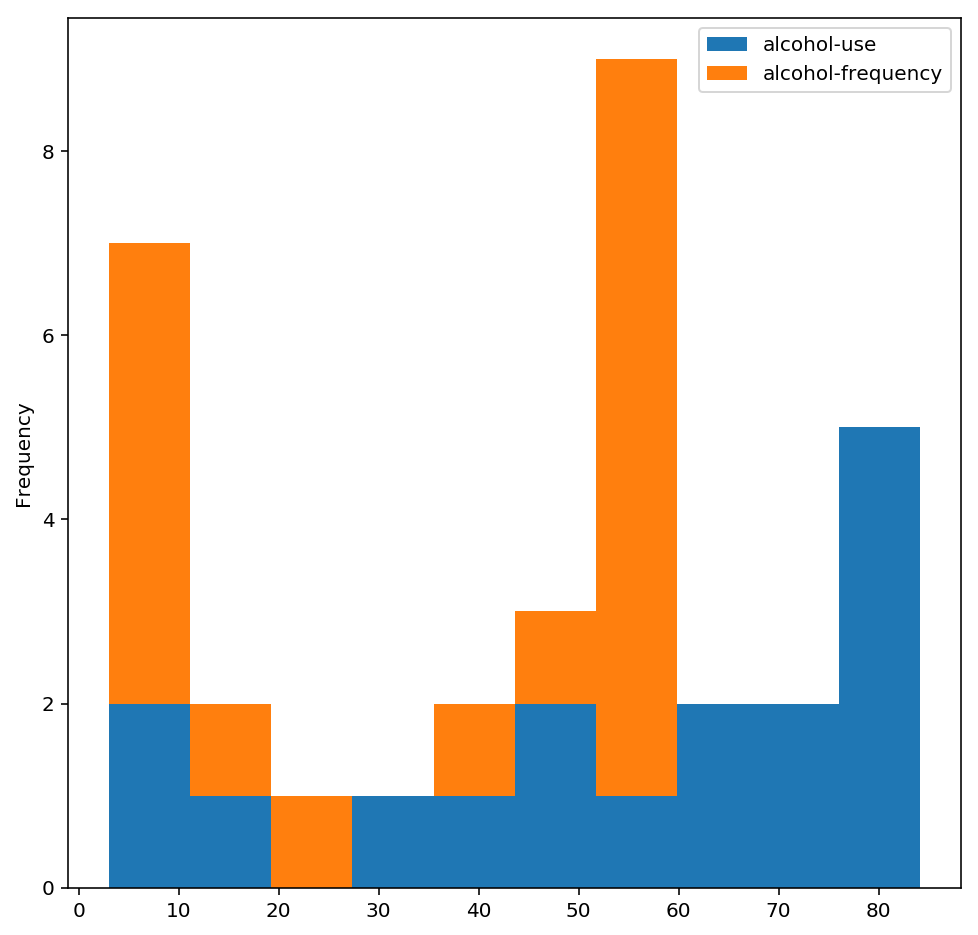

In [33]:
dataDrugClean.groupby('age').sum()[['alcohol-use', 'alcohol-frequency']].plot.hist(stacked=True, bins=10, figsize=(8,8))

In [34]:
# sns.pairplot(dataDrugClean.groupby('age').sum()[['alcohol-use', 'alcohol-frequency']],size=6)
dataDrugClean.groupby('age').sum()[['alcohol-use','alcohol-frequency']]

,alcohol-use,alcohol-frequency
age,,
12.0,3.9,3.0
13.0,8.5,6.0
14.0,18.1,5.0
15.0,29.2,6.0
16.0,40.1,10.0
17.0,49.3,13.0
18.0,58.7,24.0
19.0,64.6,36.0
20.0,69.7,48.0


**Report**



...

Surprsingly, there's a huge amount of underage dinking involved.
The legal drinking age in Singapore is 18 but 21 for USA.
It's especially worrying especially the jumps betwen the 14-16 age groups.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [35]:
import numpy 

rate = dataSat.Rate.values
rate
# print len(rate)

array([82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56,
       55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12,
       12, 11, 11,  9,  9,  9,  8,  8,  8,  7,  6,  6,  5,  5,  4,  4,  4,
       45], dtype=int64)

In [36]:
dataSat['Rate'].describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [37]:
print 'Mean: {}'.format(np.mean(rate))
print 'Median: {}'.format(np.median(rate))
print 'Standard Deviartion: {}'.format(np.std(rate))

Mean: 37.1538461538
Median: 33.5
Standard Deviartion: 27.0379964945


In [38]:
# Z-score method
# Taking a Z-score is simply mapping the data onto a distribution whose mean is defined as 0 and whose standard deviation is defined as 1.

elements = numpy.array(rate)

mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in rate if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
print(final_list)
# print len(final_list)

[82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45]


In [39]:
print 'Mean: {}'.format(np.mean(final_list))
print 'Median: {}'.format(np.median(final_list))
print 'Standard Deviartion: {}'.format(np.std(final_list))

Mean: 37.1538461538
Median: 33.5
Standard Deviartion: 27.0379964945


Even after running the the outlier removal method using z-score, there was no changes to the data.
Thus we can conclude that there are no outliers for Rate in this data set.

In [40]:
DF= dataSat.drop('Rate', 1)
DF.head(3)

,State,Verbal,Math,Verbal and Math Difference
0,CT,509,510,-1
1,NJ,499,513,-14
2,MA,511,515,-4


In [57]:
new_index=dataSat['State'].values
new_index
# dataSat=dataSat.reindex(new_index)
dataSat2=dataSat
dataSat2=dataSat2.set_index('State')

In [58]:
#Update: Misinterpredated the question, should be dropping rate and then evalute the ooutlier
# Take out the rate first, leaving only verbal and math
VerbalMathOnly=dataSat2[['Verbal','Math']]
VerbalMathOnly

,Verbal,Math
State,,
CT,509,510
NJ,499,513
MA,511,515
NY,495,505
NH,520,516
RI,501,499
PA,500,499
VT,511,506
ME,506,500


In [59]:
VerbalMathOnly.describe()

,Verbal,Math
count,52.000000,52.000000
mean,532.019231,531.500000
std,33.236225,36.014975
min,482.000000,439.000000
25%,501.000000,504.000000
50%,526.500000,521.000000
75%,562.000000,555.750000
max,593.000000,603.000000


In [60]:
print 'Mean: {}'.format(np.mean(VerbalMathOnly))
print 'Median: {}'.format(np.median(VerbalMathOnly))
print 'Standard Deviartion: {}'.format(np.std(VerbalMathOnly))

Mean: Verbal    532.019231
Math      531.500000
dtype: float64
Median: 525.5
Standard Deviartion: Verbal    32.915095
Math      35.666996
dtype: float64


In [61]:
#Finding the outlier using threshold method
def outlierFinder(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

In [62]:
outlierFinder(VerbalMathOnly, threshold=95)

,Verbal,Math
State,,
CT,False,False
NJ,False,False
MA,False,False
NY,False,False
NH,False,False
RI,False,False
PA,False,False
VT,False,False
ME,False,False


In [71]:
# The outliers are DC, OH, Wi, IA and ND
# Drop the outlier
VerbalMathOnly=VerbalMathOnly[abs(VerbalMathOnly - np.mean(VerbalMathOnly)) < 1 * np.std(VerbalMathOnly)]

In [73]:
# Rune otlier finder again
outlierFinder(VerbalMathOnly, threshold=95)

,Verbal,Math
State,,
CT,False,False
NJ,False,False
MA,False,False
NY,False,False
NH,False,False
RI,False,False
PA,False,False
VT,False,False
ME,False,False


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [47]:
dataSat.cov()

,Rate,Verbal,Math,Verbal and Math Difference
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal and Math Difference,-43.552036,27.499623,-219.931373,247.430995


In [48]:
dataSat.corr(method='spearman')

,Rate,Verbal,Math,Verbal and Math Difference
Rate,1.000000,-0.833294,-0.813275,-0.014266
Verbal,-0.833294,1.000000,0.905205,0.060244
Math,-0.813275,0.905205,1.000000,-0.239883
Verbal and Math Difference,-0.014266,0.060244,-0.239883,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [49]:
dataSat['Rate Percentile']=dataSat['Rate'].apply(lambda x:stats.percentileofscore(dataSat['Rate'],x))

In [50]:
dataSat[dataSat['State']=='CA']

,State,Rate,Verbal,Math,Verbal and Math Difference,Rate Percentile
23,CA,51,498,517,-19,56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

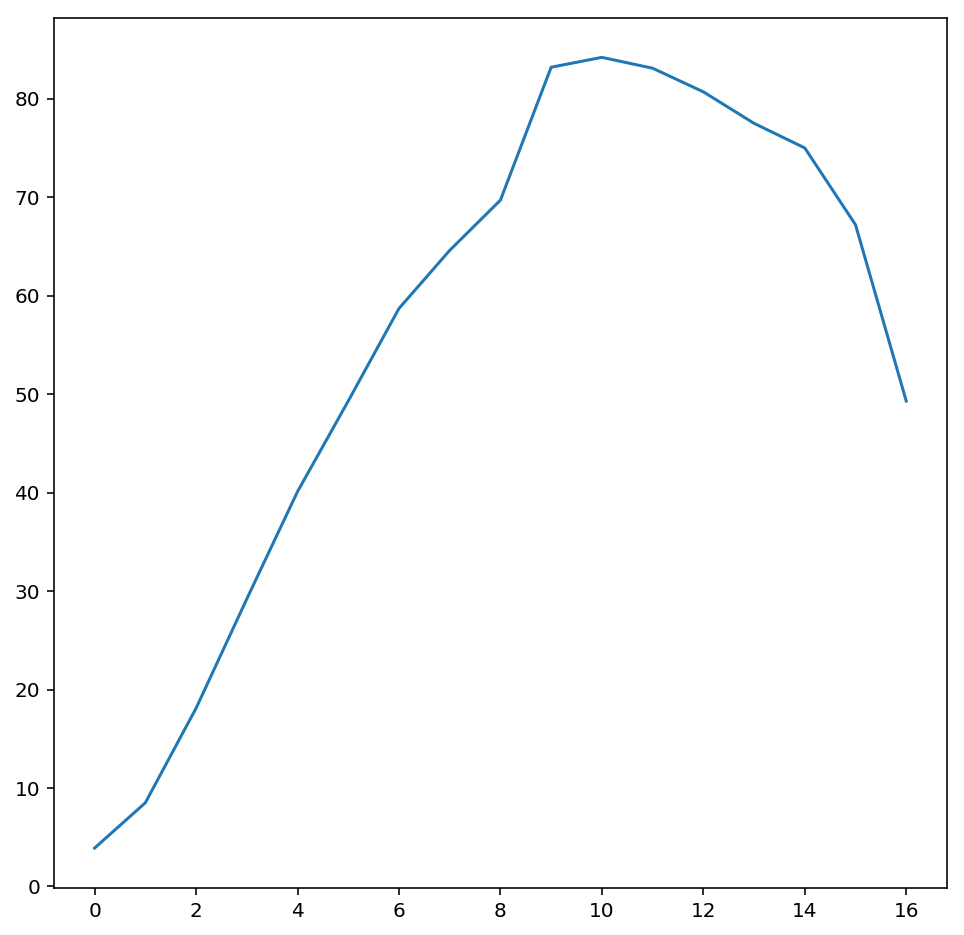

In [51]:
dataDrugClean['alcohol-use'].plot(figsize=(8,8))

In [52]:
dataDrugClean['Alcohol Percentile']=dataDrugClean['alcohol-use'].apply(lambda x:stats.percentileofscore(dataDrugClean['alcohol-use'],x))

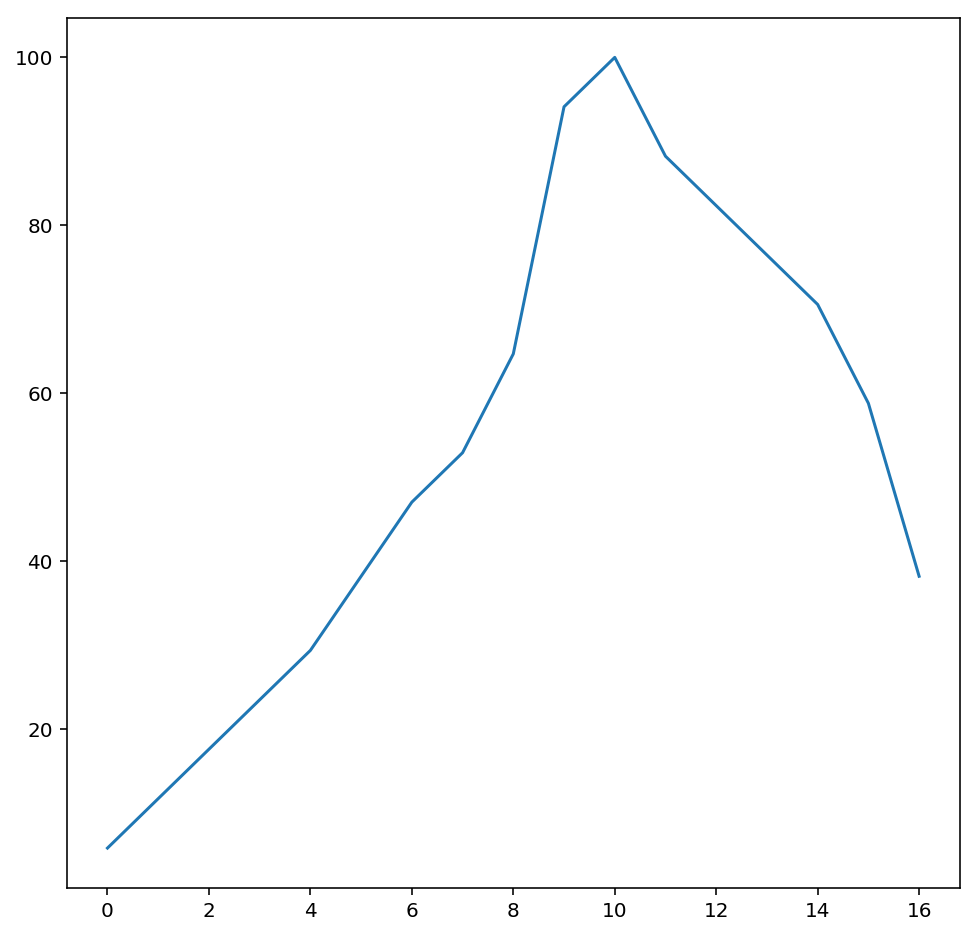

In [53]:
dataDrugClean['Alcohol Percentile'].plot(figsize=(8,8))